In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline

In [3]:
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)

In [4]:
X = mnist['data'].astype("uint8")
y = mnist['target'].astype("float64") 

In [5]:
print(X.dtype, y.dtype)
print(X.shape, y.shape)

uint8 float64
(70000, 784) (70000,)


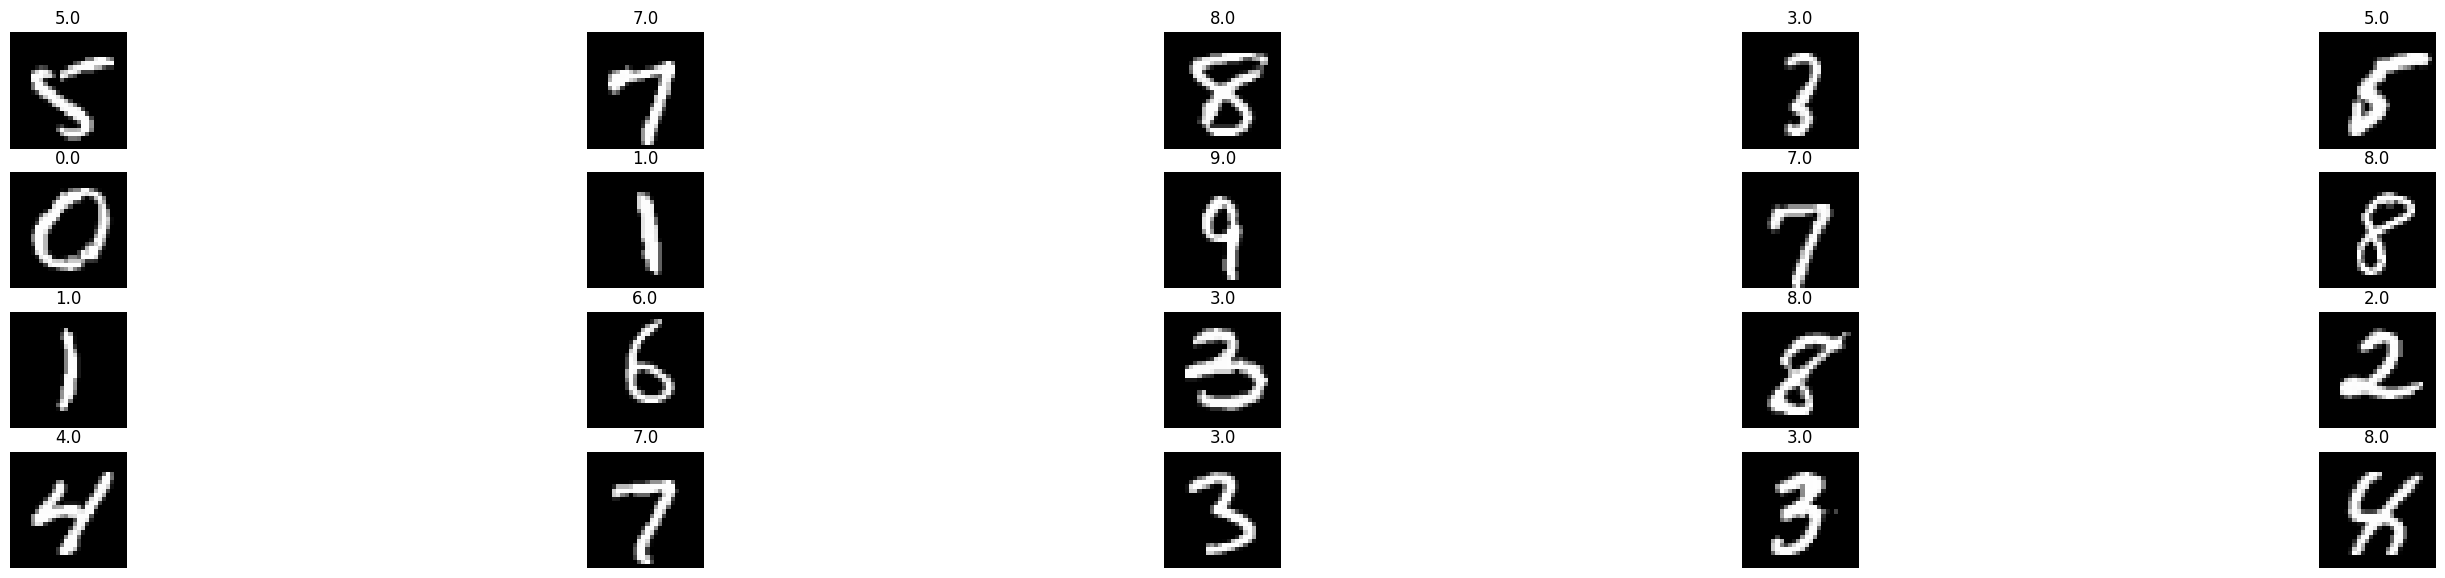

In [6]:
def plot_images(images, labels):
    n_cols = min (5, len(images))
    n_rows = len(images)
    fig = plt.figure(figsize=(36, 36))

    for i in range(len(images)):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()

p = np.random.permutation(len(X))
p = p[:20]
plot_images(X[p].reshape(-1, 28, 28), y[p])

In [7]:
y = y.astype("int32")
X = X / 255.0

In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [9]:
train_X.shape, test_X.shape

((52500, 784), (17500, 784))

In [10]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(train_X, train_y)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
cls.score(test_X, test_y)

0.8288571428571428

In [12]:
from sklearn.metrics import classification_report
predictions = cls.predict(test_X)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1727
           1       0.88      0.94      0.91      2020
           2       0.87      0.82      0.85      1779
           3       0.79      0.81      0.80      1729
           4       0.83      0.74      0.79      1745
           5       0.85      0.68      0.75      1501
           6       0.88      0.90      0.89      1718
           7       0.95      0.84      0.89      1857
           8       0.67      0.78      0.72      1689
           9       0.70      0.83      0.76      1735

    accuracy                           0.83     17500
   macro avg       0.83      0.82      0.83     17500
weighted avg       0.84      0.83      0.83     17500



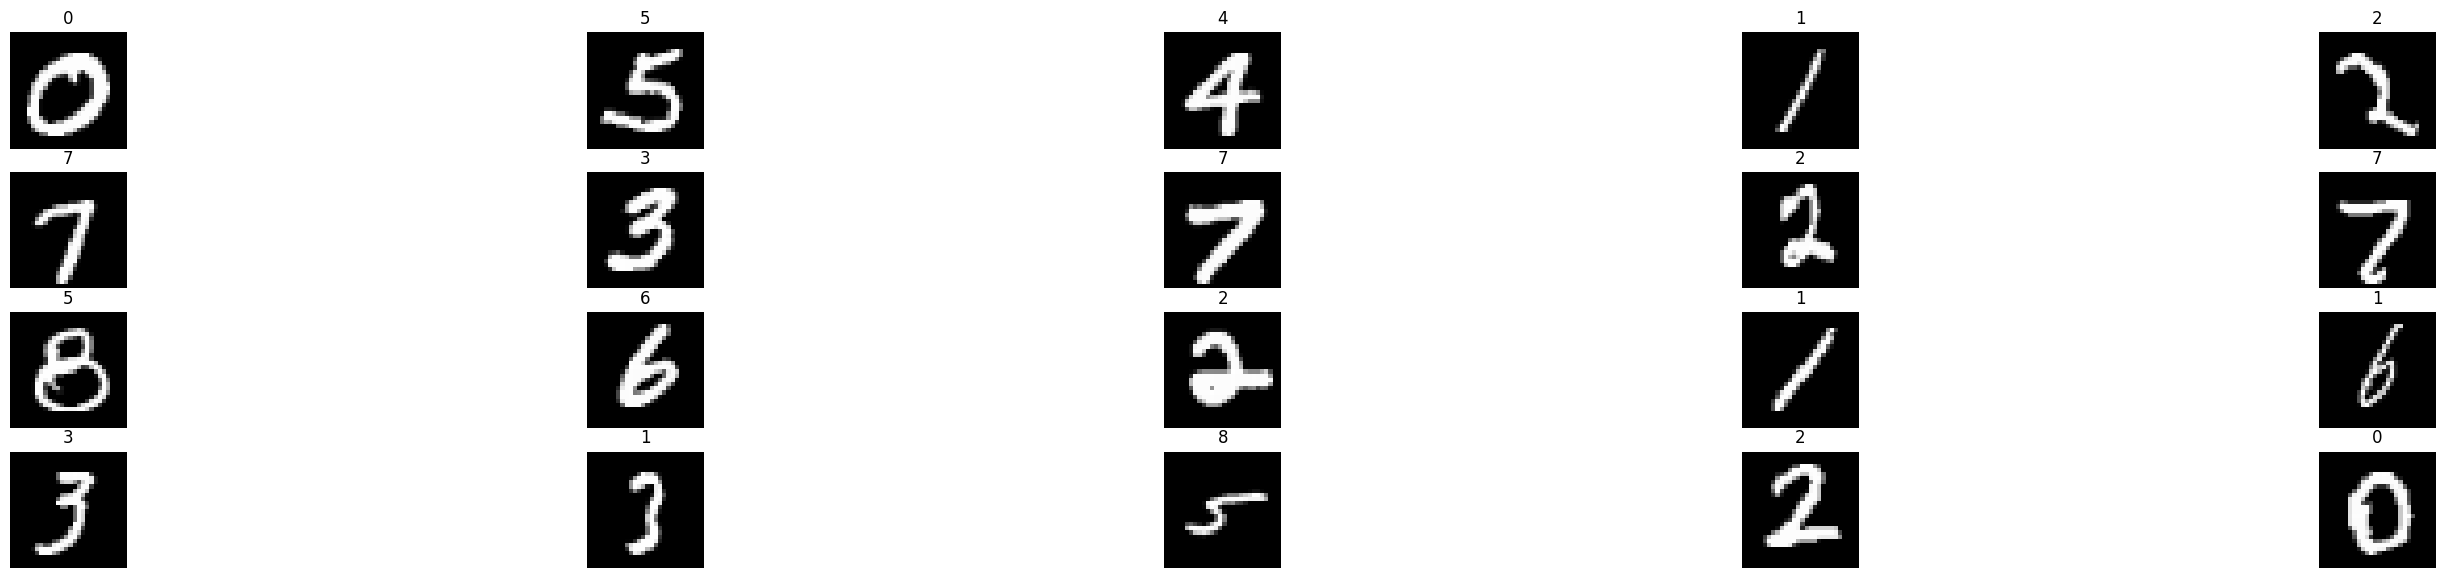

In [13]:
p = np.random.permutation(len(test_X))
p = p[:20]
plot_images(test_X[p].reshape(-1, 28, 28), predictions[p])

In [14]:
import joblib
joblib.dump(cls, "modelo_entrenado.pkl")


['modelo_entrenado.pkl']

In [15]:
cls = joblib.load("modelo_entrenado.pkl")